In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5997,5998,15583033,Huguley,640,France,Female,20,4,0.00,2,0,1,78310.82,0
1843,1844,15769346,Baird,587,France,Female,36,1,134997.49,2,1,0,44688.08,0
8540,8541,15728709,Shih,484,Germany,Male,40,7,106901.42,2,0,0,118045.98,0
720,721,15721658,Fleming,672,Spain,Female,56,2,209767.31,2,1,1,150694.42,1
5767,5768,15573284,Olisanugo,579,France,Female,45,2,0.00,2,0,0,11514.39,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.drop('CustomerId', axis = 'columns', inplace = True)

In [10]:
df.head(5)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.dtypes

RowNumber            int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [25]:
df[df.Exited==0].Tenure

1        1
3        1
4        2
6        7
8        4
        ..
9993     7
9994     2
9995     5
9996    10
9999     4
Name: Tenure, Length: 7963, dtype: int64

In [23]:
df.Tenure.max() #therefore tenure is in years

10

In [117]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [32]:
(df['Exited']==0).sum()

7963

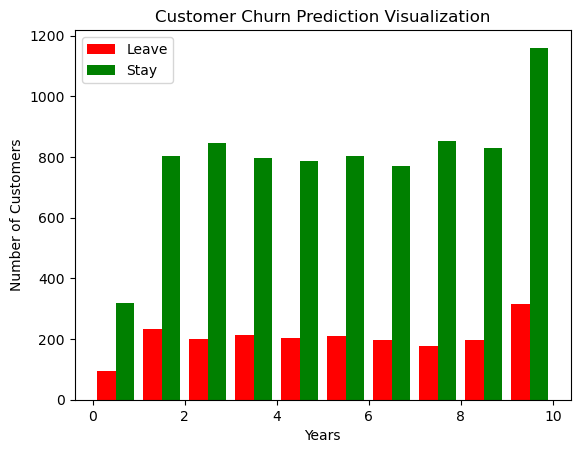

In [36]:
tenure_exit_no = df[df.Exited==0].Tenure
tenure_exit_yes = df[df.Exited==1].Tenure
plt.xlabel('Years')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_exit_yes, tenure_exit_no], color = ['red', 'green'], label = ['Leave', 'Stay'])
plt.legend()

In [43]:
df['CreditScore'].value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

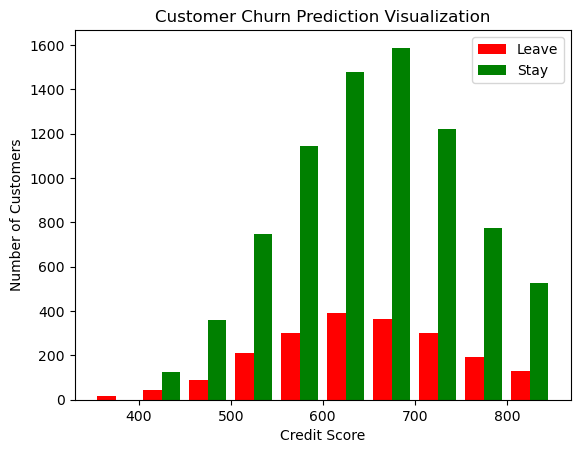

In [37]:
cs_exit_no = df[df.Exited==0].CreditScore
cs_exit_yes = df[df.Exited==1].CreditScore
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([cs_exit_yes, cs_exit_no], color = ['red', 'green'], label = ['Leave', 'Stay'])
plt.legend()

In [56]:
df.drop('Surname', axis = 'columns', inplace = True)

In [60]:
def print_unique_col_values(df):    
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [53]:
df['Gender'].replace({'Female' : 1, 'Male' : 0}, inplace = True)

In [54]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [61]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [62]:
df1 = pd.get_dummies(data = df, columns = ['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [63]:
df1.sample(4)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
3370,698,1,47,6,0.00,1,1,0,50213.81,1,False,False,True
7452,573,0,44,8,0.00,2,0,0,62424.46,0,False,False,True
7171,637,0,30,6,122641.56,2,1,0,65618.01,0,False,True,False
6702,661,0,37,7,109908.06,2,1,0,115037.67,1,False,True,False


In [65]:
df1.shape

(10000, 13)

In [68]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
dtype: object

In [72]:
df1[['Geography_France', 'Geography_Germany', 'Geography_Spain']].replace({True : 1, False : 0}, inplace = True)

C:\Users\Nana Kwame\AppData\Local\Temp\ipykernel_17872\1736077443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Geography_France', 'Geography_Germany', 'Geography_Spain']].replace({True : 1, False : 0}, inplace = True)


In [73]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [74]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
7763,614,1,36,1,44054.84,1,1,1,73329.08,0,False,False,True
5724,641,0,40,5,102145.13,1,1,1,100637.07,0,False,False,True
5028,478,1,38,4,171913.87,1,1,0,51820.87,1,True,False,False
2086,725,1,32,0,0.00,2,1,1,138525.19,0,False,False,True
6465,730,0,26,6,0.00,2,1,1,185808.70,0,False,False,True


In [75]:
df1[['Geography_France', 'Geography_Germany', 'Geography_Spain']] = df1[['Geography_France', 'Geography_Germany', 'Geography_Spain']].replace({True: 1, False: 0})

In [76]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [77]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
4256,596,1,76,9,134208.25,1,1,1,13455.43,0,0,0,1
7285,679,0,29,3,0.00,2,1,1,63687.06,0,1,0,0
5238,723,0,30,3,124119.54,1,1,0,162198.32,0,1,0,0
9245,681,1,41,0,120549.29,2,1,0,175722.31,0,1,0,0
123,684,1,48,10,126384.42,1,1,1,198129.36,0,0,1,0


In [81]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [80]:
df1.isnull().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [83]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [85]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
3575,0.580,1,0.648649,0.9,0.462490,0.000000,0,1,0.923211,0,1,0,0
2052,0.678,0,0.108108,0.4,0.481183,0.000000,0,1,0.745383,0,0,1,0
5227,0.702,0,0.067568,0.3,0.000000,0.333333,1,0,0.194764,0,1,0,0
847,0.236,1,0.324324,0.5,0.000000,0.333333,1,0,0.626529,0,1,0,0
7935,0.464,0,0.202703,0.6,0.000000,0.333333,0,1,0.364832,0,0,0,1


In [86]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = df1.drop('Exited', axis = 'columns')
y = df1['Exited']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [90]:
X_train.shape

(8000, 12)

In [91]:
X_test.shape

(2000, 12)

In [92]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,1,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,1,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,1,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,0,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,0,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [93]:
len(X_train.columns)

12

In [94]:
import tensorflow as tf
from tensorflow import keras

In [99]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(12,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
250/250 [==============================] - 6s 10ms/step - loss: 0.5130 - accuracy: 0.7899
Epoch 2/20
250/250 [==============================] - 2s 10ms/step - loss: 0.4790 - accuracy: 0.7959
Epoch 3/20
250/250 [==============================] - 3s 11ms/step - loss: 0.4671 - accuracy: 0.7986
Epoch 4/20
250/250 [==============================] - 2s 8ms/step - loss: 0.4571 - accuracy: 0.8020
Epoch 5/20
250/250 [==============================] - 2s 8ms/step - loss: 0.4483 - accuracy: 0.8041
Epoch 6/20
250/250 [==============================] - 2s 10ms/step - loss: 0.4411 - accuracy: 0.8076
Epoch 7/20
250/250 [==============================] - 2s 8ms/step - loss: 0.4347 - accuracy: 0.8108
Epoch 8/20
250/250 [==============================] - 3s 11ms/step - loss: 0.4297 - accuracy: 0.8126
Epoch 9/20
250/250 [==============================] - 3s 11ms/step - loss: 0.4252 - accuracy: 0.8142
Epoch 10/20
250/250 [==============================] - 2s 9ms/step - loss: 0.4215 - accuracy: 

In [100]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 3s 13ms/step - loss: 0.4063 - accuracy: 0.8185


[0.4063170850276947, 0.8184999823570251]

In [101]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 2s 13ms/step


array([[0.14185886],
       [0.05260196],
       [0.06629093],
       [0.06455191],
       [0.10535318]], dtype=float32)

In [110]:
y_test[:20]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
8594    0
1805    0
3631    0
837     0
9322    0
4186    0
6568    0
5401    0
8467    0
1995    0
Name: Exited, dtype: int64

In [103]:
y_pred = []
for element in yp:
    if element >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [111]:
y_pred[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [112]:
from sklearn.metrics import confusion_matrix , classification_report

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1595
           1       0.65      0.22      0.33       405

    accuracy                           0.82      2000
   macro avg       0.74      0.60      0.61      2000
weighted avg       0.79      0.82      0.78      2000



In [114]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'Truth')

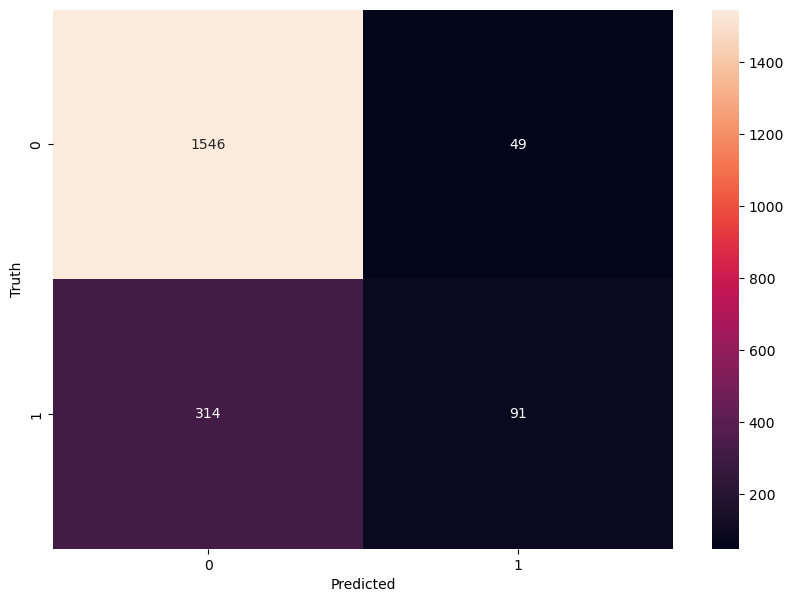

In [116]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')